In [16]:
# Import the required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data into pandas dataframes. The data has to be manually saved to a folder called 'data'.
# Note: the data is quite large, so this may take a while (~40 seconds)
train_df = pd.read_csv(os.path.join('data', 'training_set_VU_DM.csv'))
test_df = pd.read_csv(os.path.join('data', 'test_set_VU_DM.csv'))

In [46]:
print(f"Period of data collection: {pd.to_datetime(train_df['date_time']).min().strftime('%Y/%m/%d')} - {pd.to_datetime(train_df['date_time']).max().strftime('%Y/%m/%d')}")
print(f"Train data contains {train_df.shape[0]:,} rows and {train_df.shape[1]} columns")
print(f"Test data contains {test_df.shape[0]:,} rows and {test_df.shape[1]} columns")
print()
print(f"Number of unique search IDs: {len(train_df['srch_id'].unique()):,}")
print(f"Number of unique property IDs: {len(train_df['prop_id'].unique()):,}")
print(f"Number of clicks per search: avg. {train_df['click_bool'].sum() / len(train_df['srch_id'].unique()):.2f}, std. {train_df['click_bool'].std():.2f}")
print(f"Number of bookings per search: avg. {train_df['booking_bool'].sum() / len(train_df['srch_id'].unique()):.2f}, std. {train_df['booking_bool'].std():.2f}")

Period of data collection: 2012/11/01 - 2013/06/30
Train data contains 4,958,347 rows and 54 columns
Test data contains 4,959,183 rows and 50 columns

Number of unique search IDs: 199,795
Number of unique property IDs: 129,113
Number of clicks per search: avg. 1.11, std. 0.21
Number of bookings per search: avg. 0.69, std. 0.16


### Data Columns

| Column Name                 | Data Type | Description                                                                                                                                                                                                       |
|-----------------------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| position                    | Integer   | Hotel position on Expedia's search results page. This is only provided for the training data, but not the test data.                                                                                              |
| gross_booking_usd           | Float     | Total value of the transaction. This can differ from the price_usd due to taxes, fees, conventions on multiple day bookings and purchase of a room type other than the one shown in the search                    |
| click_bool                  | Boolean   | 1 if the user clicked on the property, 0 if not.                                                                                              |
| booking_bool                | Boolean   | 1 if the user booked the property, 0 if not.                    |
|                             |           ||
| srch_id                     | Integer   | The ID of the search                                                                                                                                                                                              |
| date_time                   | Date/time | Date and time of the search                                                                                                                                                                                       |
| site_id                     | Integer   | ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ..)                                                                                                                              |
| visitor_location_country_id | Integer   | The ID of the country the customer is located                                                                                                                                                                     |
| visitor_hist_starrating     | Float     | The mean star rating of hotels the customer has previously purchased; null signifies there is no purchase history on the customer                                                                                 |
| visitor_hist_adr_usd        | Float     | The mean price per night (in US$) of the hotels the customer has previously purchased; null signifies there is no purchase history on the customer                                                                |
| prop_country_id             | Integer   | The ID of the country the hotel is located in                                                                                                                                                                     |
| prop_id                     | Integer   | The ID of the hotel                                                                                                                                                                                               |
| prop_starrating             | Integer   | The star rating of the hotel, from 1 to 5, in increments of 1. A 0 indicates the property has no stars, the star rating is not known or cannot be publicized.                                                     |
| prop_review_score           | Float     | The mean customer review score for the hotel on a scale out of 5, rounded to 0.5 increments. A 0 means there have been no reviews, null that the information is not available.                                    |
| prop_brand_bool             | Integer   | +1 if the hotel is part of a major hotel chain; 0 if it is an independent hotel                                                                                                                                   |
| prop_location_score1        | Float     | A (first) score outlining the desirability of a hotel’s location                                                                                                                                                  |
| prop_location_score2        | Float     | A (second) score outlining the desirability of the hotel’s location                                                                                                                                               |
| prop_log_historical_price   | Float     | The logarithm of the mean price of the hotel over the last trading period. A 0 will occur if the hotel was not sold in that period.                                                                               |
| price_usd                   | Float     | Displayed price of the hotel for the given search. Note that different countries have different conventions regarding displaying taxes and fees and the value may be per night or for the whole stay              |
| promotion_flag              | Integer   | +1 if the hotel had a sale price promotion specifically displayed                                                                                                                                                 |
| srch_destination_id         | Integer   | ID of the destination where the hotel search was performed                                                                                                                                                        |
| srch_length_of_stay         | Integer   | Number of nights stay that was searched                                                                                                                                                                           |
| srch_booking_window         | Integer   | Number of days in the future the hotel stay started from the search date                                                                                                                                          |
| srch_adults_count           | Integer   | The number of adults specified in the hotel room                                                                                                                                                                  |
| srch_children_count         | Integer   | The number of (extra occupancy) children specified in the hotel room                                                                                                                                              |
| srch_room_count             | Integer   | Number of hotel rooms specified in the search                                                                                                                                                                     |
| srch_saturday_night_bool    | Boolean   | +1 if the stay includes a Saturday night, starts from Thursday with a length of stay is less than or equal to 4 nights (i.e. weekend); otherwise 0                                                                |
| srch_query_affinity_score   | Float     | The log of the probability a hotel will be clicked on in Internet searches (hence the values are negative)  A null signifies there are no data (i.e. hotel did not register in any searches)                      |
| orig_destination_distance   | Float     | Physical distance between the hotel and the customer at the time of search. A null means the distance could not be calculated.                                                                                    |
| random_bool                 | Boolean   | +1 when the displayed sort was random, 0 when the normal sort order was displayed                                                                                                                                 |
| comp*x*_rate                | Integer   | '*x*' denotes the competitor number. +1 if Expedia has a lower price than competitor 1 for the hotel; 0 if the same; -1 if Expedia’s price is higher than competitor 1; null signifies there is no competitive data |
| comp*x*_inv                 | Integer   | '*x*' denotes the competitor number. +1 if competitor 1 does not have availability in the hotel; 0 if both Expedia and competitor 1 have availability; null signifies there is no competitive data                  |
| comp*x*_rate_percent_diff   | Float     | '*x*' denotes the competitor number. The absolute percentage difference (if one exists) between Expedia and competitor 1’s price (Expedia’s price the denominator); null signifies there is no competitive data      |


## Ideas for feature engineering
The 1st place team of the original Kaggle competition commented they used the following features:
-all numeric features
-average of numeric features per prop_id
-stddev of numeric features per prop_id
-median of numeric features per prop_id

The last 3 can be calculated using train+test.

As models they used variations of rankLib/LambdaMART, GBDTs, NNs, SGD models.

# Data Exploration

In [24]:
# Check the first 500 rows of the training data
train_df.head(500)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,44,2013-03-19 15:57:46,15,55,NaN,NaN,55,130270,5,4.5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,0
496,44,2013-03-19 15:57:46,15,55,NaN,NaN,55,138977,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
497,44,2013-03-19 15:57:46,15,55,NaN,NaN,55,139249,5,4.5,...,NaN,1.0,0.0,20.0,NaN,NaN,NaN,0,NaN,0
498,45,2013-05-18 09:25:08,14,100,NaN,NaN,219,2924,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [8]:
train_df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [13]:
# Count the NaN values per column
train_df.isna().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

['comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff']


C:\Users\niels\AppData\Local\Temp\ipykernel_19592\839764531.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.drop(columns=competition_cols).corr()


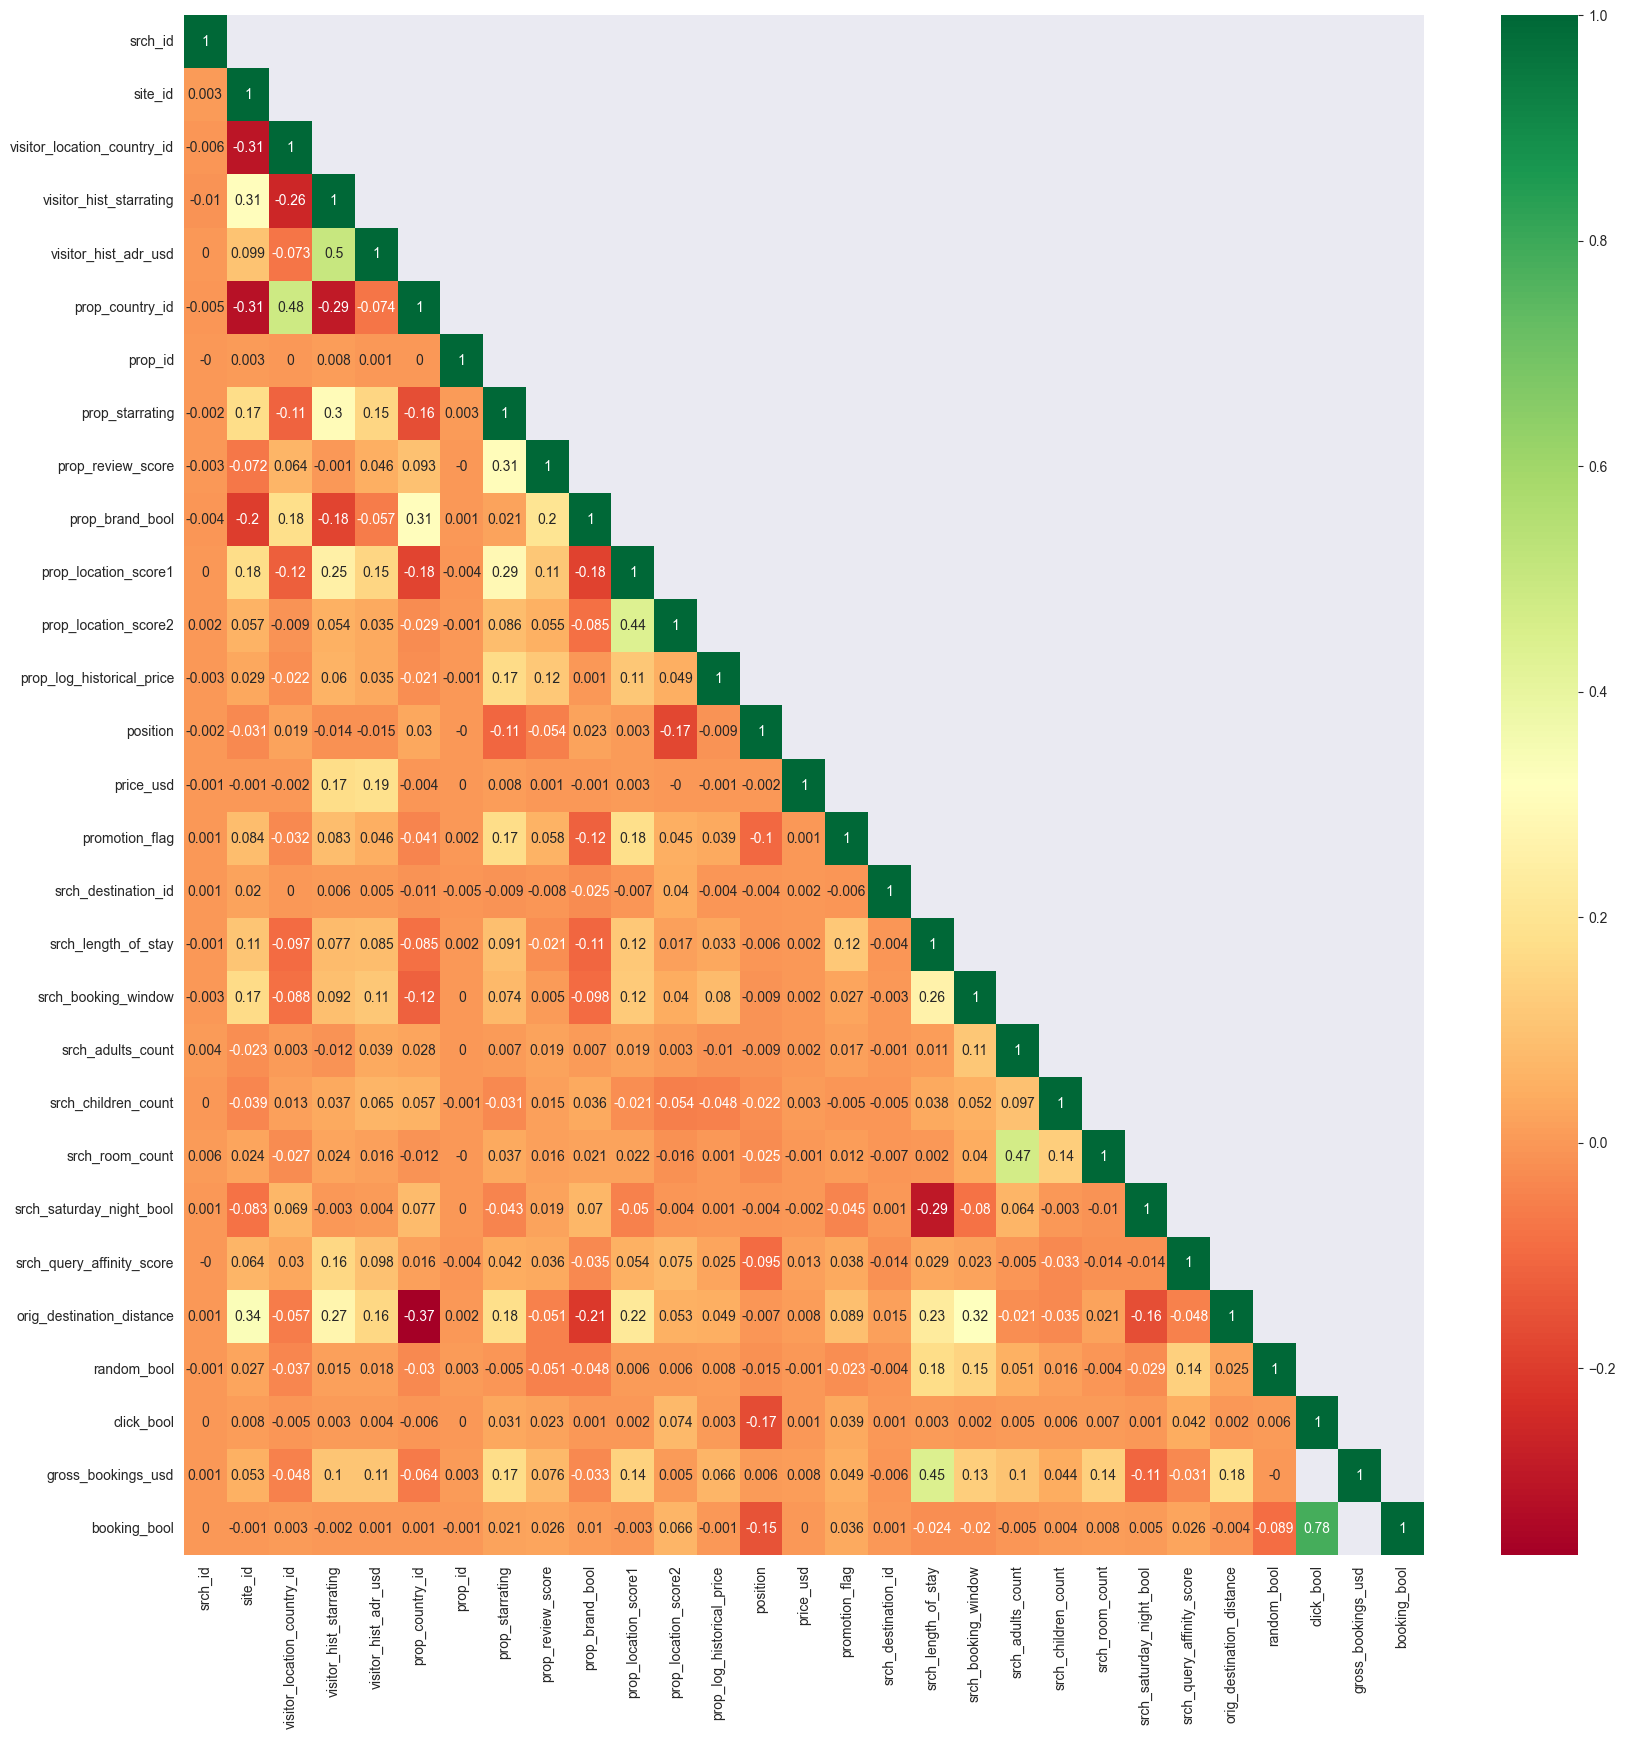

In [22]:
competition_cols = [col for col in train_df.columns if "comp" in col]
print(competition_cols)
# Create correlation matrix
corr_matrix = train_df.drop(columns=competition_cols).corr()
# Select lower triangle of correlation matrix
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(bool))
# Round all values to 3 decimals
lower = lower.round(3)
# Plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(lower, annot=True, cmap="RdYlGn")
plt.show()